In [1]:
import torch
from torch import nn
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt


print(f'Using Pytorch version:{torch.__version__}')

if torch.cuda.is_available():
  print(f'Using GPU device: {torch.cuda.get_device_name[0]}')
  device = torch.device('cuda')
else:
  print('No GPU Found, using CPU instead')
  device = torch.device('cpu')

print('Using device:', device)

#### Training Dataset #####

train_loader = torch.utils.data.DataLoader(
    MNIST(root='.', train=True, download=True,
          transform=transforms.ToTensor()),
    batch_size=100, shuffle=True, pin_memory=True)

#print(len(train_loader))

#### Test dataset ####
test_loader = torch.utils.data.DataLoader(
    MNIST(root='.', train=False, download=True,
          transform=transforms.ToTensor()),
    batch_size=100, shuffle=True, pin_memory=True)


Using Pytorch version:2.3.0+cu121
No GPU Found, using CPU instead
Using device: cpu
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 29918999.69it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1111622.19it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3239651.50it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6185236.61it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [2]:
#### Iterate over data ####

for batch_idx, (data, target) in enumerate(train_loader):
  print(f"Batch ID = {batch_idx}")
  print(f"Data size = {data.size()}   Data type = {data.type()}")
  print(f"Target size = {target.size()}   Target type = {target.type()}")
  '''
  if batch_idx == 599:
    print(f"data = {data} \n Target = {target}")

  '''


Batch ID = 0
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 1
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 2
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 3
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 4
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 5
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 6
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target s

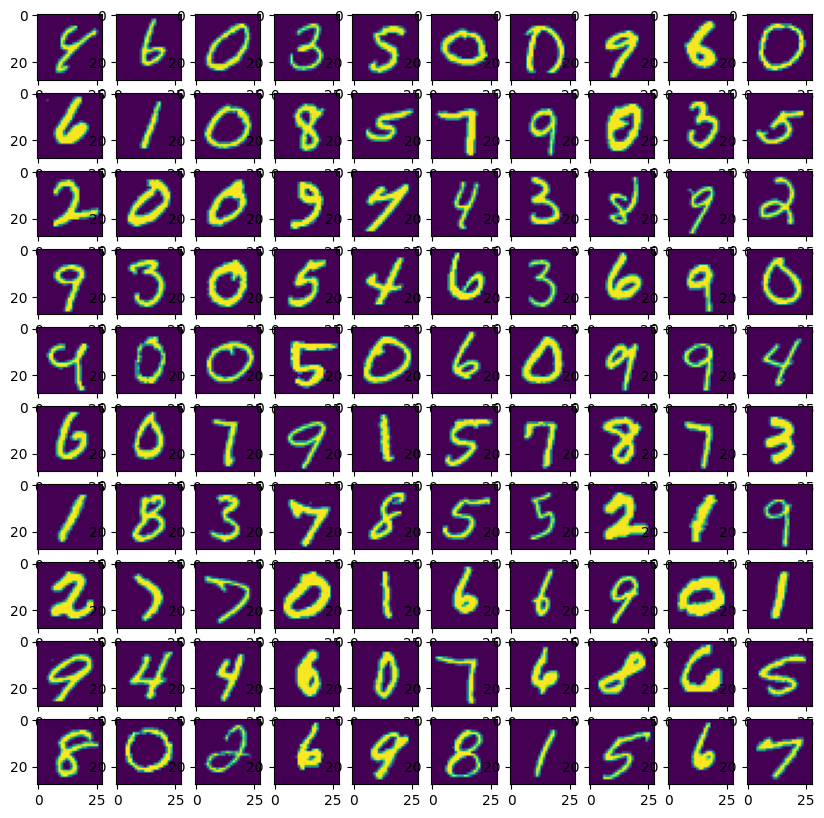

In [3]:
### pring the first 100 digits ####
plt.figure(figsize = (10, 10))

for x in range(100):
    plt.subplot(10,10,x+1)
    plt.imshow(data[x,:,:,:].numpy().reshape(28,28))

In [4]:
##### Building MLP using nn.Module - the NN super class from which we will inherit

class MyMLP(nn.Module):

  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 20),
        nn.ReLU(),
        nn.Linear(20, 10)
    )

  def forward(self,x):
      return self.layers(x)

model = MyMLP().to(device)
print(model)


MyMLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): ReLU()
    (3): Linear(in_features=20, out_features=10, bias=True)
  )
)


In [8]:
#### Setting the loss and the optimizer

Loss = nn.CrossEntropyLoss()

GD = torch.optim.Adam(model.parameters(), lr=1e-3)


#### Calculating correctly predicted labels ####

def correctly_predicted(output,target):
  predicted = torch.argmax(output, dim=1)
  correct_ones = (predicted==target).type(torch.float)
  return correct_ones.sum().item()


In [12]:

def train(data_loader,model,Loss,GD):

  model.train()

  num_batches = len(data_loader)
  num_samples = len(data_loader.dataset)

  total_loss = 0
  total_accurate = 0



  for data, target in data_loader:


    ## copy to device
    data = data.to(device)
    target = target.to(device)

    #print(f"Length of data = {len(data)} and that of target is {len(target)}")

    ### forward pass
    output = model(data)
    #print(f"Length of output = {len(output)}")

    ### Calculate loss ###
    #output_singular = torch.argmax(output, dim=1)
    #target_float = target.float()
    batch_loss = Loss(output,target)
    total_loss += batch_loss.item()

    ### Count correctly predicted labels###
    correctly_predicted_count = correctly_predicted(output,target)
    total_accurate += correctly_predicted_count

    ### backward propagation
    GD.zero_grad()
    batch_loss.backward()
    GD.step()


  train_loss = total_loss/num_batches
  accuracy = total_accurate/num_samples
  print(f"Average loss: {train_loss:4f}, accuracy: {accuracy:.2%}")











epochs = 20
for i in range(epochs):
  print(f"Epoch numer: {i}")
  train(train_loader, model, Loss, GD)





Epoch numer: 0
Average loss: 0.263162, accuracy: 92.42%
Epoch numer: 1
Average loss: 0.232697, accuracy: 93.29%
Epoch numer: 2
Average loss: 0.211455, accuracy: 93.89%
Epoch numer: 3
Average loss: 0.194829, accuracy: 94.27%
Epoch numer: 4
Average loss: 0.181882, accuracy: 94.72%
Epoch numer: 5
Average loss: 0.171017, accuracy: 94.96%
Epoch numer: 6
Average loss: 0.162693, accuracy: 95.21%
Epoch numer: 7
Average loss: 0.154486, accuracy: 95.39%
Epoch numer: 8
Average loss: 0.147950, accuracy: 95.62%
Epoch numer: 9
Average loss: 0.142048, accuracy: 95.78%
Epoch numer: 10
Average loss: 0.136450, accuracy: 95.95%
Epoch numer: 11
Average loss: 0.131975, accuracy: 96.11%
Epoch numer: 12
Average loss: 0.127368, accuracy: 96.18%
Epoch numer: 13
Average loss: 0.123207, accuracy: 96.31%
Epoch numer: 14
Average loss: 0.119850, accuracy: 96.37%
Epoch numer: 15
Average loss: 0.116586, accuracy: 96.52%
Epoch numer: 16
Average loss: 0.112999, accuracy: 96.70%
Epoch numer: 17
Average loss: 0.109968, a

In [14]:
### Testing #####

def test(data_loader,model,Loss,GD):

  model.eval()

  num_batches_test = len(data_loader)
  num_samples_test = len(data_loader.dataset)

  total_loss_test = 0
  total_accurate_test = 0



  for data, target in data_loader:

    ## copy to device
    data = data.to(device)
    target = target.to(device)



    ### forward pass
    output = model(data)
    #print(f"Length of output = {len(output)}")

    ### Calculate loss ###
    batch_loss = Loss(output,target)
    total_loss_test += batch_loss

    ### Count correctly predicted labels###
    correctly_predicted_count = correctly_predicted(output,target)
    total_accurate_test += correctly_predicted_count


  test_loss = total_loss_test/num_batches_test
  accuracy_test = total_accurate_test/num_samples_test
  print(f"Average loss: {test_loss:4f}, accuracy: {accuracy_test:.2%}")




In [ ]:
test(test_loader,model,Loss,GD)

Average loss: 0.150607, accuracy: 95.41%
